<a href="https://colab.research.google.com/github/fauziass22/Klasifikasi_LondonCrime/blob/main/Klasifikasi_london_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [ ]:
!kaggle datasets download -d london-data-store/london-crime --unzip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 181, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import NearestNeighbors

In [ ]:
df=pd.read_csv("../london_crime_by_lsoa.csv")

In [2]:
import torch
import numpy as np
import sklearn
import spacy
import tensorflow as tf
from spacy import load as spacy_load
from transformers import BertTokenizer, BertModel

In [ ]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [ ]:
import pandas as pd
import numpy as np

# Memuat data dari DataFrame ke dalam array numpy
data = df.values





In [ ]:
import pandas as pd

# Menghapus baris dengan nilai null
cleaned_df = df.dropna()

# Menyimpan data yang telah dibersihkan kembali ke DataFrame
cleaned_df = cleaned_df.reset_index(drop=True)

In [ ]:
cleaned_df = df.dropna(subset=['value'])

In [ ]:
k = 5
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')


In [ ]:
# Mengonversi kolom 'value' menjadi numerik
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Mengonversi kolom 'year' dan 'month' menjadi numerik (jika diperlukan)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Membersihkan baris yang memiliki nilai non-finite (NA atau inf)
df = df.dropna(subset=['year', 'month'])

# Mengonversi kolom 'year' dan 'month' menjadi tipe data integer
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Mengubah data string menjadi numerik menggunakan Label Encoder
df['lsoa_code'] = label_encoder.fit_transform(df['lsoa_code'])
df['borough'] = label_encoder.fit_transform(df['borough'])
df['major_category'] = label_encoder.fit_transform(df['major_category'])
df['minor_category'] = label_encoder.fit_transform(df['minor_category'])

# Menggabungkan kolom-kolom yang diperlukan
data = df[['lsoa_code', 'borough', 'major_category', 'minor_category', 'value', 'year', 'month']].values


<ipython-input-14-41d8fc82acb6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
<ipython-input-14-41d8fc82acb6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype(int)
<ipython-input-14-41d8fc82acb6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
import pandas as pd
import numpy as np

# Memuat data dari DataFrame ke dalam array numpy
data = df.values

# Menghapus baris dengan nilai null atau hilang
data = data[~np.isnan(data).any(axis=1)]

# Menghapus baris dengan nilai nol
data = data[~np.all(data == 0, axis=1)]

# Mengganti nilai null dengan nilai yang valid atau menggunakan teknik pengisian yang sesuai
data[np.isnan(data)] = 0  # Mengganti nilai null dengan 0

# Mengganti nilai yang tidak valid dengan nilai rata-rata kolom
column_means = np.nanmean(data, axis=0)
inds = np.where(np.isnan(data))
data[inds] = np.take(column_means, inds[1])

# Menambahkan kolom lsoa_code, borough, major_category, minor_category, value, year, month ke data
lsoa_code = df['lsoa_code'].values
borough = df['borough'].values
major_category = df['major_category'].values
minor_category = df['minor_category'].values
value = df['value'].values
year = df['year'].values
month = df['month'].values

data = np.column_stack((lsoa_code, borough, major_category, minor_category, value, year, month))

# Membuat DataFrame baru dengan kolom yang sesuai
columns = ['lsoa_code', 'borough', 'major_category', 'minor_category', 'value', 'year', 'month']
cleaned_df = pd.DataFrame(data, columns=columns)


In [ ]:
k = 5
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(data)


NearestNeighbors(metric='euclidean')

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = data[:, :-1]  # Fitur
y = data[:, -1]   # Target

# Bagi data menjadi dataset dan dataset uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: ", accuracy)


Akurasi:  0.08256427158866184


In [ ]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=12345
... )

In [ ]:
>>> from sklearn.neighbors import KNeighborsRegressor
>>> knn_model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
>>> knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
>>> from sklearn.metrics import mean_squared_error
>>> from math import sqrt
>>> train_preds = knn_model.predict(X_train)
>>> mse = mean_squared_error(y_train, train_preds)
>>> rmse = sqrt(mse)
>>> rmse

2.8079536611595532

In [ ]:
>>> test_preds = knn_model.predict(X_test)
>>> mse = mean_squared_error(y_test, test_preds)
>>> rmse = sqrt(mse)
>>> rmse

3.964109658535835

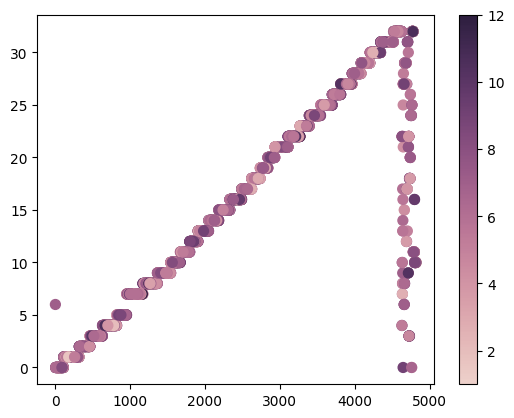

In [ ]:
>>> import seaborn as sns
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
... )
>>> f.colorbar(points)
>>> plt.show()

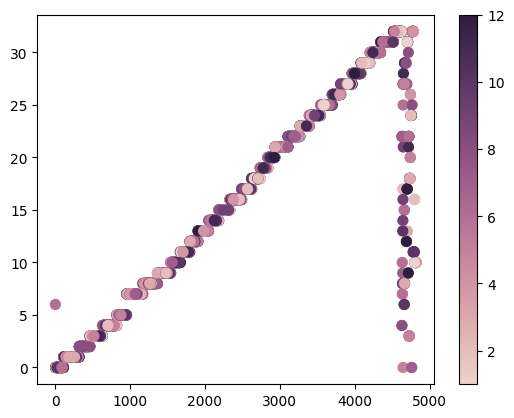

In [ ]:
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
>>> )
>>> f.colorbar(points)
>>> plt.show()

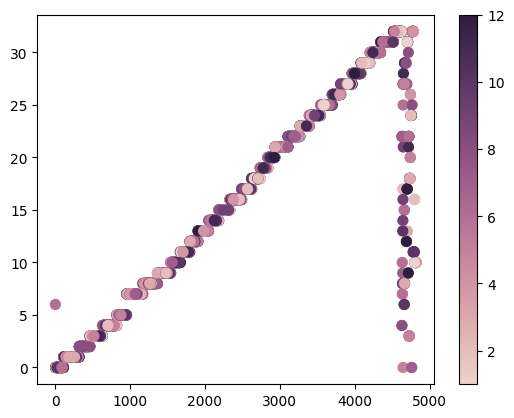

In [ ]:
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
>>> )
>>> f.colorbar(points)
>>> plt.show()

In [ ]:
>>> from sklearn.model_selection import GridSearchCV
>>> parameters = {"n_neighbors": range(1, 50)}
>>> gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
>>> gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [ ]:
>>> gridsearch.best_params_
{'n_neighbors': 25, 'weights': 'distance'}

{'n_neighbors': 25, 'weights': 'distance'}

In [ ]:
>>> train_preds_grid = gridsearch.predict(X_train)
>>> train_mse = mean_squared_error(y_train, train_preds_grid)
>>> train_rmse = sqrt(train_mse)
>>> test_preds_grid = gridsearch.predict(X_test)
>>> test_mse = mean_squared_error(y_test, test_preds_grid)
>>> test_rmse = sqrt(test_mse)
>>> train_rmse

3.414338462903458

In [ ]:
print(test_rmse)


3.4582102990921304


In [ ]:
>>> parameters = {
...     "n_neighbors": range(1, 50),
...     "weights": ["uniform", "distance"],
... }
>>> gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
>>> gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
>>> gridsearch.best_params_
{'n_neighbors': 25, 'weights': 'distance'}
>>> test_preds_grid = gridsearch.predict(X_test)
>>> test_mse = mean_squared_error(y_test, test_preds_grid)
>>> test_rmse = sqrt(test_mse)
>>> test_rmse

3.4582102990921304

In [ ]:
>>> best_k = gridsearch.best_params_["n_neighbors"]
>>> best_weights = gridsearch.best_params_["weights"]
>>> bagged_knn = KNeighborsRegressor(
...     n_neighbors=best_k, weights=best_weights
... )

In [ ]:
>>> from sklearn.ensemble import BaggingRegressor
>>> bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Inisialisasi model BaggingRegressor
bagging_model = BaggingRegressor()

# Melakukan fitting pada model dengan data pelatihan (X_train, y_train)
bagging_model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian (X_test)
test_preds_grid = bagging_model.predict(X_test)

# Menghitung mean squared error (MSE)
test_mse = mean_squared_error(y_test, test_preds_grid)

# Menghitung root mean squared error (RMSE)
test_rmse = sqrt(test_mse)

# Cetak nilai RMSE
print(test_rmse)


3.794288689717954


In [ ]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menggunakan dataset dari DataFrame yang telah didefinisikan sebelumnya (misalnya, df)
X = df.drop(columns=['borough'])  # Ganti 'target' dengan kolom target yang sesuai
y = df['month']  # Ganti 'target' dengan kolom target yang sesuai

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.6220610854757196
              precision    recall  f1-score   support

           1       0.73      0.77      0.75       749
           2       0.56      0.61      0.58       771
           3       0.59      0.61      0.60       759
           4       0.62      0.60      0.61       792
           5       0.58      0.61      0.60       779
           6       0.59      0.55      0.57       741
           7       0.59      0.61      0.60       740
           8       0.60      0.60      0.60       759
           9       0.60      0.57      0.59       768
          10       0.57      0.61      0.59       769
          11       0.61      0.57      0.59       722
          12       0.85      0.76      0.80       753

    accuracy                           0.62      9102
   macro avg       0.62      0.62      0.62      9102
weighted avg       0.62      0.62      0.62      9102

[[577 165   6   1   0   0   0   0   0   0   0   0]
 [201 472  95   3   0   0   0   0   0   0   0   0]
 [ 16 201 46

In [ ]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menggunakan dataset dari DataFrame yang telah didefinisikan sebelumnya (misalnya, df)
X = df.drop(columns=['minor_category'])  # Ganti 'target' dengan kolom target yang sesuai
y = df['major_category']  # Ganti 'target' dengan kolom target yang sesuai

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.9069435288947484
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       704
           1       0.83      0.95      0.89      1357
           2       0.89      0.85      0.87       806
           3       0.73      0.35      0.48       155
           4       0.87      0.88      0.87       526
           5       0.92      0.92      0.92       638
           6       1.00      0.08      0.15        73
           7       0.93      0.97      0.95      2688
           8       0.96      0.94      0.95      2155

    accuracy                           0.91      9102
   macro avg       0.89      0.75      0.77      9102
weighted avg       0.91      0.91      0.90      9102

[[ 551  151    2    0    0    0    0    0    0]
 [  61 1286   10    0    0    0    0    0    0]
 [  12  106  685    1    0    0    0    2    0]
 [   0    0   70   55   30    0    0    0    0]
 [   0    0    6   19  461   40    0    0    0]
 [   0    0    0    0   38  587    0

In [ ]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menggunakan dataset dari DataFrame yang telah didefinisikan sebelumnya (misalnya, df)
X = df.drop(columns=['borough'])  # Ganti 'target' dengan kolom target yang sesuai
y = df['major_category']  # Ganti 'target' dengan kolom target yang sesuai

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.958910129641837
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       704
           1       0.95      0.99      0.97      1357
           2       0.96      0.91      0.94       806
           3       0.92      0.63      0.75       155
           4       0.94      0.99      0.96       526
           5       0.98      0.99      0.99       638
           6       0.86      0.26      0.40        73
           7       0.94      0.99      0.96      2688
           8       0.98      0.94      0.96      2155

    accuracy                           0.96      9102
   macro avg       0.95      0.85      0.88      9102
weighted avg       0.96      0.96      0.96      9102

[[ 704    0    0    0    0    0    0    0    0]
 [   6 1346    5    0    0    0    0    0    0]
 [   1   64  735    4    0    0    0    2    0]
 [   0    2   24   97   32    0    0    0    0]
 [   0    0    1    4  519    2    0    0    0]
 [   0    0    0    0    1  630    0 

In [ ]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menggunakan dataset dari DataFrame yang telah didefinisikan sebelumnya (misalnya, df)
X = df[['major_category']]  # Fitur-fitur numerik yang ingin digunakan
y = df['month']  # Kolom target yang ingin digunakan

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.08217974071632608
              precision    recall  f1-score   support

           1       0.08      0.39      0.14       749
           2       0.09      0.30      0.13       771
           3       0.00      0.00      0.00       759
           4       0.08      0.08      0.08       792
           5       0.00      0.00      0.00       779
           6       0.00      0.00      0.00       741
           7       0.08      0.08      0.08       740
           8       0.09      0.02      0.03       759
           9       0.00      0.00      0.00       768
          10       0.00      0.00      0.00       769
          11       0.07      0.13      0.09       722
          12       0.00      0.00      0.00       753

    accuracy                           0.08      9102
   macro avg       0.04      0.08      0.05      9102
weighted avg       0.04      0.08      0.05      9102

[[292 210   0  65   0   0  61  14   0   0 107   0]
 [296 230   0  55   0   0  54  20   0   0 116   0]
 [302 211  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menggunakan dataset dari DataFrame yang telah didefinisikan sebelumnya (misalnya, df)
X = df.drop(columns=['borough'])  # Ganti 'target' dengan kolom target yang sesuai
y = df['major_category']  # Ganti 'target' dengan kolom target yang sesuai

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.958910129641837
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       704
           1       0.95      0.99      0.97      1357
           2       0.96      0.91      0.94       806
           3       0.92      0.63      0.75       155
           4       0.94      0.99      0.96       526
           5       0.98      0.99      0.99       638
           6       0.86      0.26      0.40        73
           7       0.94      0.99      0.96      2688
           8       0.98      0.94      0.96      2155

    accuracy                           0.96      9102
   macro avg       0.95      0.85      0.88      9102
weighted avg       0.96      0.96      0.96      9102

[[ 704    0    0    0    0    0    0    0    0]
 [   6 1346    5    0    0    0    0    0    0]
 [   1   64  735    4    0    0    0    2    0]
 [   0    2   24   97   32    0    0    0    0]
 [   0    0    1    4  519    2    0    0    0]
 [   0    0    0    0    1  630    0 

In [ ]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menggunakan dataset dari DataFrame yang telah didefinisikan sebelumnya (misalnya, df)
X = df.drop(columns=['borough'])  # Ganti 'target' dengan kolom target yang sesuai
y = df['year']  # Ganti 'target' dengan kolom target yang sesuai

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8764007910349374
              precision    recall  f1-score   support

        2008       0.90      0.92      0.91      1016
        2009       0.84      0.87      0.86      1024
        2010       0.88      0.86      0.87      1023
        2011       0.86      0.86      0.86      1021
        2012       0.87      0.87      0.87      1036
        2013       0.87      0.86      0.86      1008
        2014       0.85      0.86      0.86       989
        2015       0.88      0.84      0.86       982
        2016       0.96      0.93      0.94      1003

    accuracy                           0.88      9102
   macro avg       0.88      0.88      0.88      9102
weighted avg       0.88      0.88      0.88      9102

[[936  80   0   0   0   0   0   0   0]
 [ 96 895  32   1   0   0   0   0   0]
 [  7  89 881  46   0   0   0   0   0]
 [  5   4  90 881  41   0   0   0   0]
 [  0   0   1  92 904  39   0   0   0]
 [  0   0   0   6  93 869  39   1   0]
 [  0   0   0   1   3  88 851  46   0]
 [ 